In [1]:
import math
import numpy as np
#%matplotlib nbagg
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

<IPython.core.display.Javascript object>


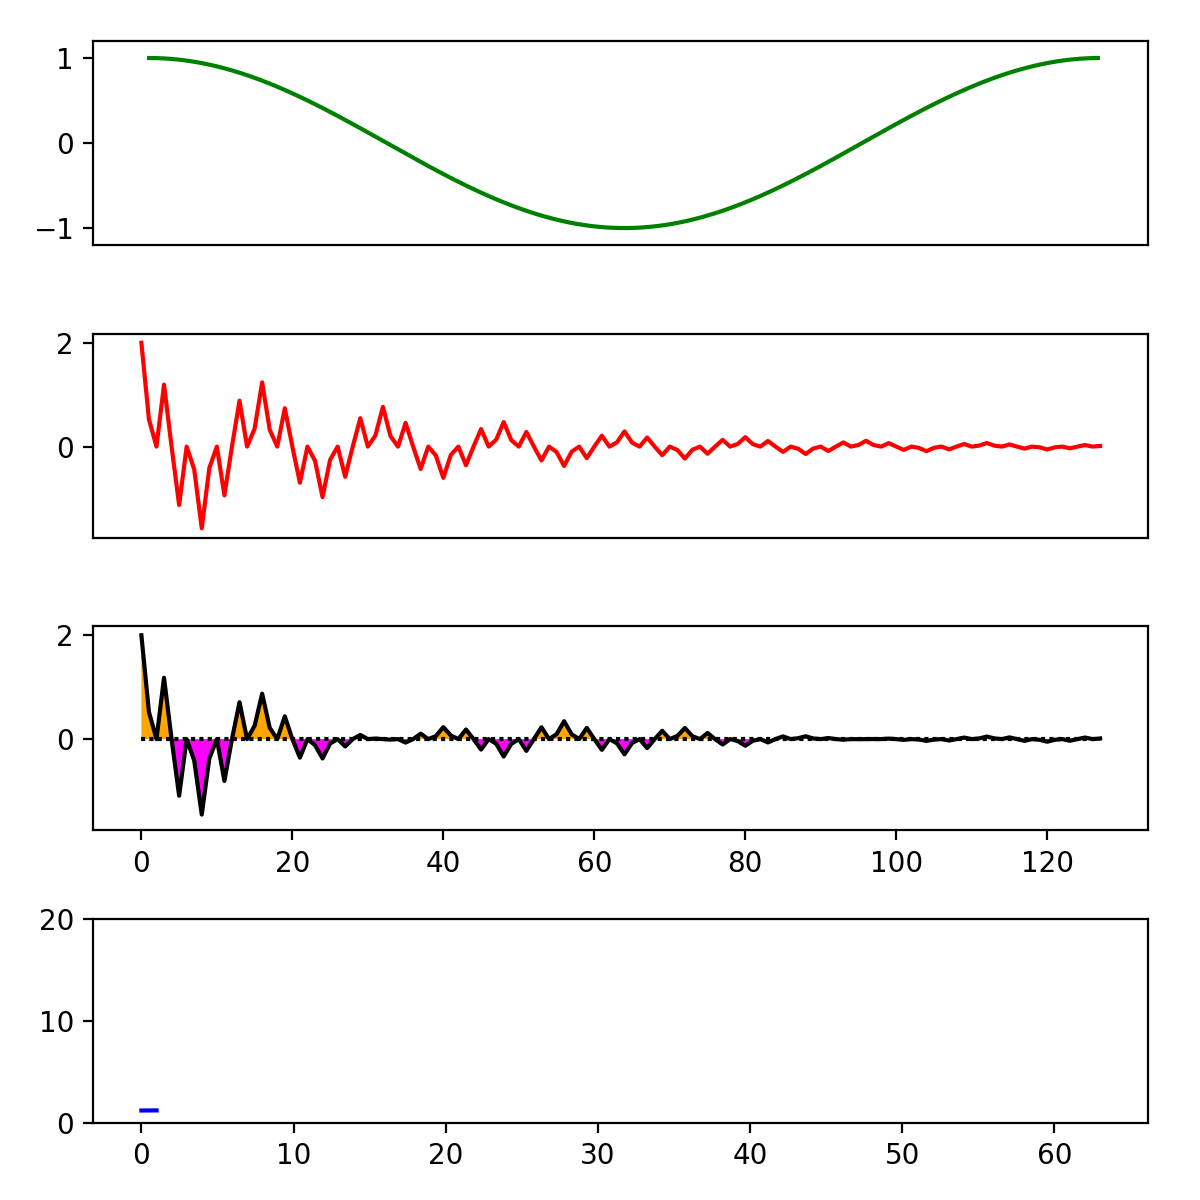

In [7]:
fs = 128       # sampling rate, Hz, must be integer
duration = 1   # in seconds, may be float
f = 32 # sine frequency, Hz, may be float

# generate samples, note conversion to float32 array
samples = 1*(np.cos(2*np.pi*np.arange(fs*duration)*f*1.25/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))
samples = samples + (np.cos(2*np.pi*np.arange(fs*duration)*f/4/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))

tests = np.arange(0,64)
trials = []
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(6,6))
fig.tight_layout()

line1, = ax1.plot(samples, color='green')
line1.axes.set_xlim(-30,128*4+26)
line1.axes.set_ylim(-1.2,1.2)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off



line2, = ax2.plot(samples, color='red')

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

line3, = ax3.plot(samples, color='black')
line3zero, = ax3.plot(np.arange(fs), np.zeros(fs), label='Using set_dashes()', color='black')
line3zero.set_dashes([1, 1])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax4.plot(samples[0:64], color='blue')
line4.axes.set_ylim(0,20)



def init():  # only required for blitting to give a clean slate.
    line1.set_ydata([np.nan] * len(samples*4))
    line2.set_ydata([np.nan] * len(samples))
    line3.set_ydata([np.nan] * len(samples))
    line4.set_ydata([np.nan] * len(tests))
    return line1,line2,line3,line4


point = []
frame = []
def animate(frames):
    if (frames == 0):
        point[:] = []
        frame[:] = []
        
    testsig = (np.cos(2*np.pi*np.arange(fs*duration)*tests[frames]/fs)).astype(np.float32)
    
    testsigplot = (np.cos(2*np.pi*np.arange(fs*duration*4)*frames/4/fs)).astype(np.float32)
    
    testmix = testsig*samples
    testresult = np.sum(testmix)
    point.append(testresult)
    frame.append(frames)
    ax3.collections.clear()
    
    line2.set_data(np.arange(128), samples)
    line1.set_data(np.arange(128*4), testsigplot)
    line3.set_data(np.arange(128), testmix)
    line4.set_data(frame, point)
    ax3.fill_between(np.arange(128), np.zeros(fs), testmix, where=testmix >= 0, facecolor='orange', interpolate=True)
    ax3.fill_between(np.arange(128), np.zeros(fs), testmix, where=testmix <= 0, facecolor='magenta', interpolate=True)
    
    return line1, line2, line3, line4
    

    
    
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = np.arange(2), blit=True, interval=256)



In [4]:
schedule = np.asarray([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0])

<IPython.core.display.Javascript object>


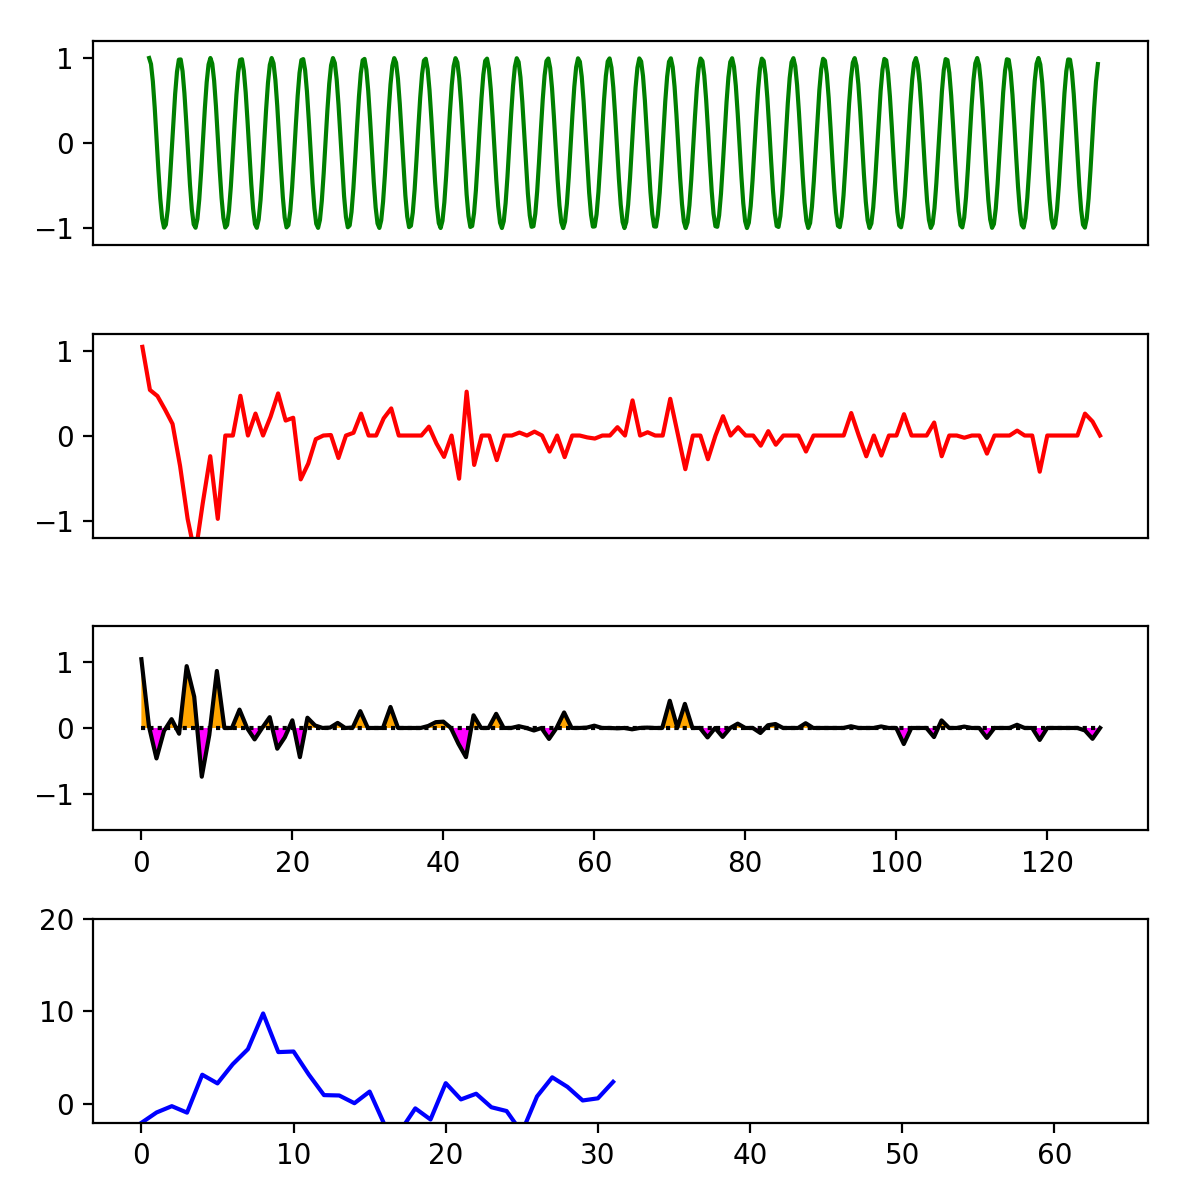

In [5]:
# generate samples, note conversion to float32 array
samples = (np.cos(2*np.pi*np.arange(fs*duration)*f/4/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))
samples = samples + np.random.normal(0, 0.25, len(samples))
schedule = np.asarray([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0])
samplesNUS = samples*schedule
tests = np.arange(0,64)

trials = []
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(6,6))
fig.tight_layout()

line1, = ax1.plot(samples, color='green')

line1.axes.set_xlim(-30,128*4+26)
line1.axes.set_ylim(-1.2,1.2)


ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


line2, = ax2.plot(samplesNUS, color='red')
line2.axes.set_ylim(-1.2,1.2)

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


y_filt = schedule[schedule > 0]
x_filt = np.arange(128)[schedule > 0]
schedplot = ax2.scatter(x_filt, y_filt*2, c='black', s=1)
line3, = ax3.plot(samples, color='black')
line3zero, = ax3.plot(np.arange(fs), np.zeros(fs), label='Using set_dashes()', color='black')
line3zero.set_dashes([1, 1])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax4.plot(samples[0:64], color='blue')
line4.axes.set_ylim(-2,20)



def init():  # only required for blitting to give a clean slate.
    line1.set_ydata([np.nan] * len(samples*4))
    line2.set_ydata([np.nan] * len(samples))
    line3.set_ydata([np.nan] * len(samples))
    line4.set_ydata([np.nan] * len(tests))
    return line1,line2,line3,line4


point = []
frame = []
def animate(frames):
    if (frames == 0):
        point[:] = []
        frame[:] = []
        
    testsig = (np.cos(2*np.pi*np.arange(fs*duration)*tests[frames]/fs)).astype(np.float32)
    
    testsigplot = (np.cos(2*np.pi*np.arange(fs*duration*4)*frames/4/fs)).astype(np.float32)
    
    testmix = testsig*samplesNUS
    testresult = np.sum(testmix)
    point.append(testresult)
    frame.append(frames)
    ax3.collections.clear()

    line2.set_data(np.arange(128), samplesNUS)
    line1.set_data(np.arange(128*4), testsigplot)
    line3.set_data(np.arange(128), testmix)
    line4.set_data(frame, point)
    ax3.fill_between(np.arange(128), np.zeros(fs), testmix, where=testmix >= 0, facecolor='orange', interpolate=True)
    ax3.fill_between(np.arange(128), np.zeros(fs), testmix, where=testmix <= 0, facecolor='magenta', interpolate=True)
    
    return line1, line2, line3, line4
    
    
    
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = np.arange(64), blit=True, interval=256)


<IPython.core.display.Javascript object>


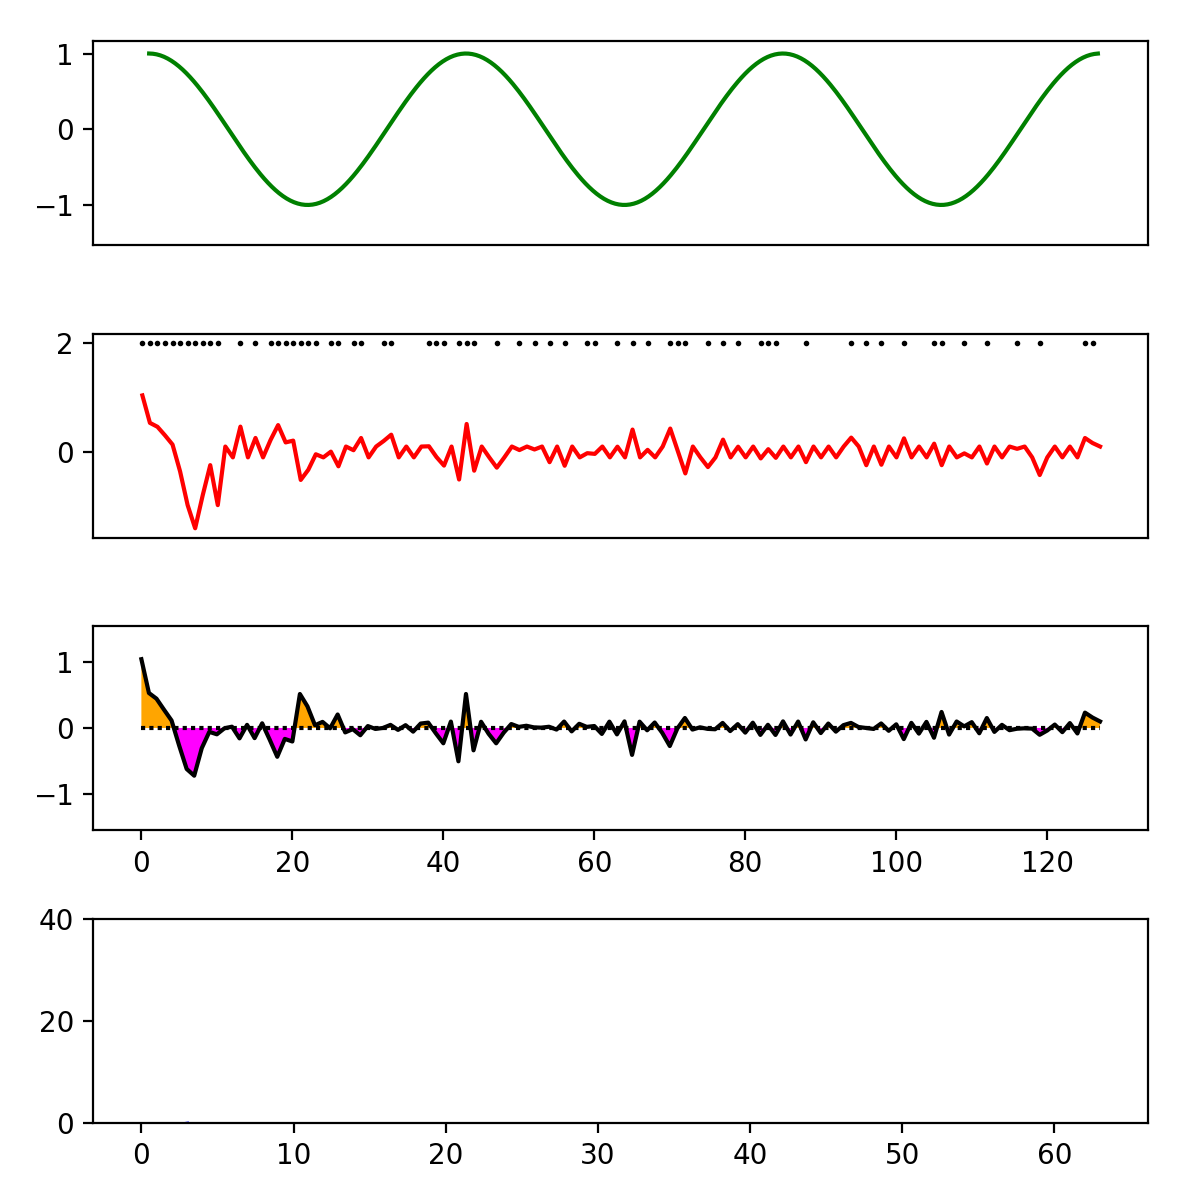

In [6]:
schedule = np.asarray([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0])

samplesNUS = np.zeros(len(schedule))

for i in range(len(schedule)):
    if schedule[i] == 1.0:
        samplesNUS[i] = samples[i]
    else:
        samplesNUS[i] = ((i%2) - 0.5)/5

#samplesNUS = samples*schedule


tests = np.arange(0,64)

trials = []
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(6,6))
fig.tight_layout()

line1, = ax1.plot(samples, color='green')

line1.axes.set_xlim(-30,128*4+26)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


line2, = ax2.plot(samplesNUS, color='red')

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off


y_filt = schedule[schedule > 0]
x_filt = np.arange(128)[schedule > 0]
schedplot = ax2.scatter(x_filt, y_filt*2, c='black', s=1)
line3, = ax3.plot(samples, color='black')
line3zero, = ax3.plot(np.arange(fs), np.zeros(fs), label='Using set_dashes()', color='black')
line3zero.set_dashes([1, 1])  # 2pt line, 2pt break, 10pt line, 2pt break
line4, = ax4.plot(samples[0:64], color='blue')
line4.axes.set_ylim(0,40)



def init():  # only required for blitting to give a clean slate.
    line1.set_ydata([np.nan] * len(samples*4))
    line2.set_ydata([np.nan] * len(samples))
    line3.set_ydata([np.nan] * len(samples))
    line4.set_ydata([np.nan] * len(tests))
    return line1,line2,line3,line4


point = []
frame = []
def animate(frames):
    if (frames == 0):
        point[:] = []
        frame[:] = []
        
    testsig = (np.cos(2*np.pi*np.arange(fs*duration)*tests[frames]/fs)).astype(np.float32)
    
    testsigplot = (np.cos(2*np.pi*np.arange(fs*duration*4)*frames/4/fs)).astype(np.float32)
    
    testmix = testsig*samplesNUS
    testresult = np.sum(testmix)
    point.append(testresult)
    frame.append(frames)
    ax3.collections.clear()

    line2.set_data(np.arange(128), samplesNUS)
    line1.set_data(np.arange(128*4), testsigplot)
    line3.set_data(np.arange(128), testmix)
    line4.set_data(frame, point)
    ax3.fill_between(np.arange(128), np.zeros(fs), testmix, where=testmix >= 0, facecolor='orange', interpolate=True)
    ax3.fill_between(np.arange(128), np.zeros(fs), testmix, where=testmix <= 0, facecolor='magenta', interpolate=True)
    
    return line1, line2, line3, line4
    
    
    
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = np.arange(64), blit=True, interval=256)


In [36]:
def pointFT(frames, samplesNUS):
    testsig = (np.cos(2*np.pi*np.arange(fs*duration)*frames/fs)).astype(np.float32)
    testmix = testsig*samplesNUS
    testresult = np.sum(testmix)
    #point.append(testresult)
    #frame.append(frames)
    return testresult

<IPython.core.display.Javascript object>


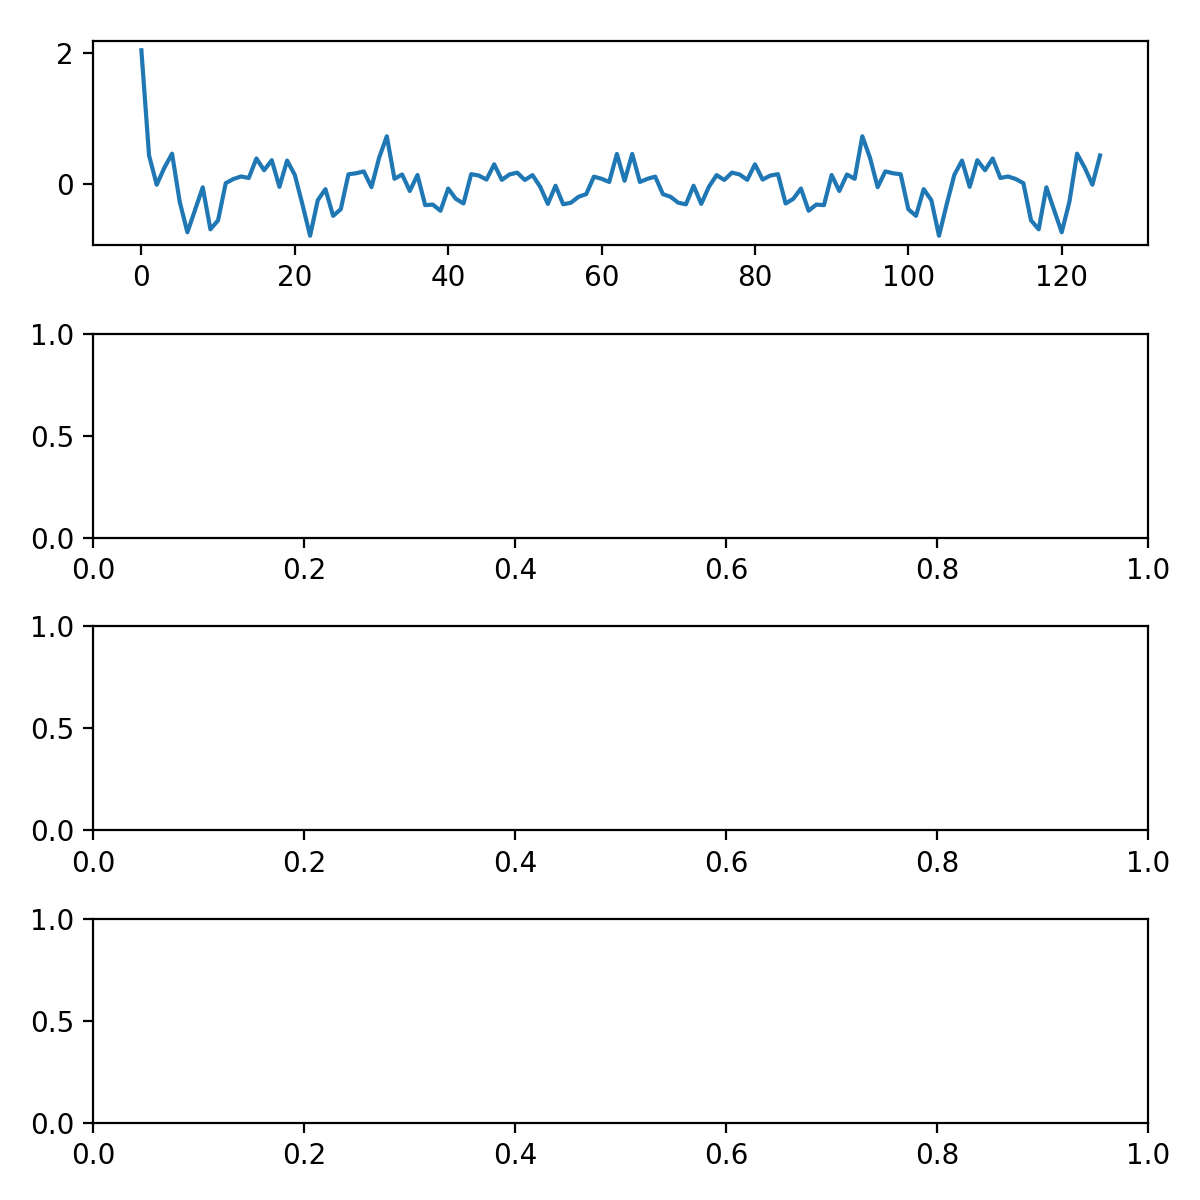

[-1.25451106  0.46946649  1.40563142  1.92004493  3.25022644  2.23901765
  2.09323373  4.48511235 22.22415851  5.25686531  1.14714452  0.38316105
  2.86600443  0.80517408  1.53531391  1.81491957 -0.56626701 -0.12457691
 -0.05139397  2.04391909  3.03236935  0.98464214  0.24161478  0.33938171
 -0.08940598  0.59378851  1.44037774  2.74971354  3.95729814 -1.26044393
  0.65398375  7.38466506 12.01875703  5.09185945  1.76793928  3.76389694
  2.80637025  3.33901886  2.3913436   0.33822212 -1.1704725  -0.28774
 -0.54587101  1.09305117  3.5198654  -0.08738116 -0.20472705  4.31328579
 -0.06871985  3.3799337  -1.27092493  1.74147677  2.34970314  2.30254847
 -1.89758417  0.39428697  1.09325121  0.16008162 -0.23543236  4.23568459
  3.71459899  1.66205679 -1.23976238  2.47486726]


In [37]:
# generate samples, note conversion to float32 array
samples = (np.cos(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))
samples = samples + (np.cos(2*np.pi*np.arange(fs*duration)*f/4/fs)).astype(np.float32)*np.exp(-.01*np.arange(fs*duration))
samplesNUS = samples*schedule

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(6,6))
fig.tight_layout()

frame = []
freq = []
fs = 128       # sampling rate, Hz, must be integer
duration = 1   # in seconds, may be float

for i in np.arange(64):
    freq.append(pointFT(i, samplesNUS))

freq = np.asarray(freq)


#freq = np.pad(freq, (0,64), 'constant', constant_values=(0))
    
print(freq)
ax1.plot(np.fft.irfft(freq))

<IPython.core.display.Javascript object>


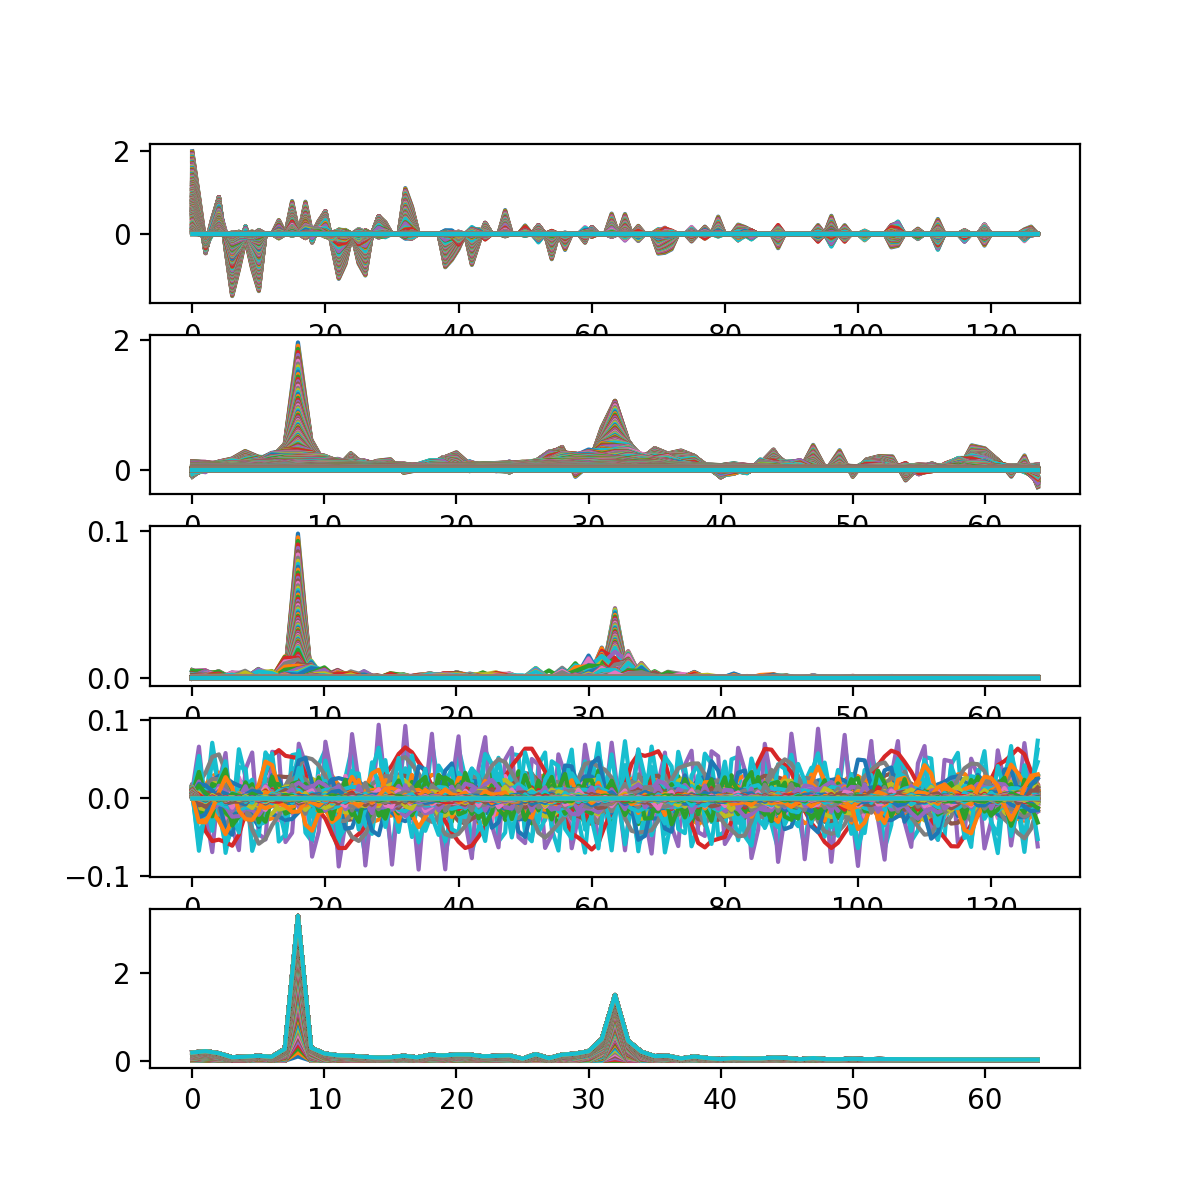

/Users/scott/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [38]:
samples = (np.cos(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))
samples = samples + (np.cos(2*np.pi*np.arange(fs*duration)*f/4/fs)).astype(np.float32)*np.exp(-.01*np.arange(fs*duration))
samplesNUS = samples*schedule

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,figsize=(6,6))
#fig.tight_layout()
store = np.zeros(int(len(samplesNUS)/2)+1)

for i in range(400):
    ax1.plot(samplesNUS)
    rfft = np.fft.rfft(samplesNUS, norm='ortho')
    ax2.plot(rfft)
    maxrfft = np.amax(rfft)
    thresh = maxrfft * 0.95
    low_values_flags = rfft < thresh
    high_values_flags = rfft >= thresh
    rfft[low_values_flags] = 0 
    rfft[high_values_flags] = rfft[high_values_flags] - thresh
    ax3.plot(rfft)
    store = store + rfft
    sub = np.fft.irfft(rfft, norm='ortho')
    ax4.plot(sub)
    ax5.plot(store)
    sub = sub * schedule
    samplesNUS = samplesNUS - sub


In [80]:
int(len(samplesNUS)/2)

64

In [82]:
len(rfft)

65

<IPython.core.display.Javascript object>


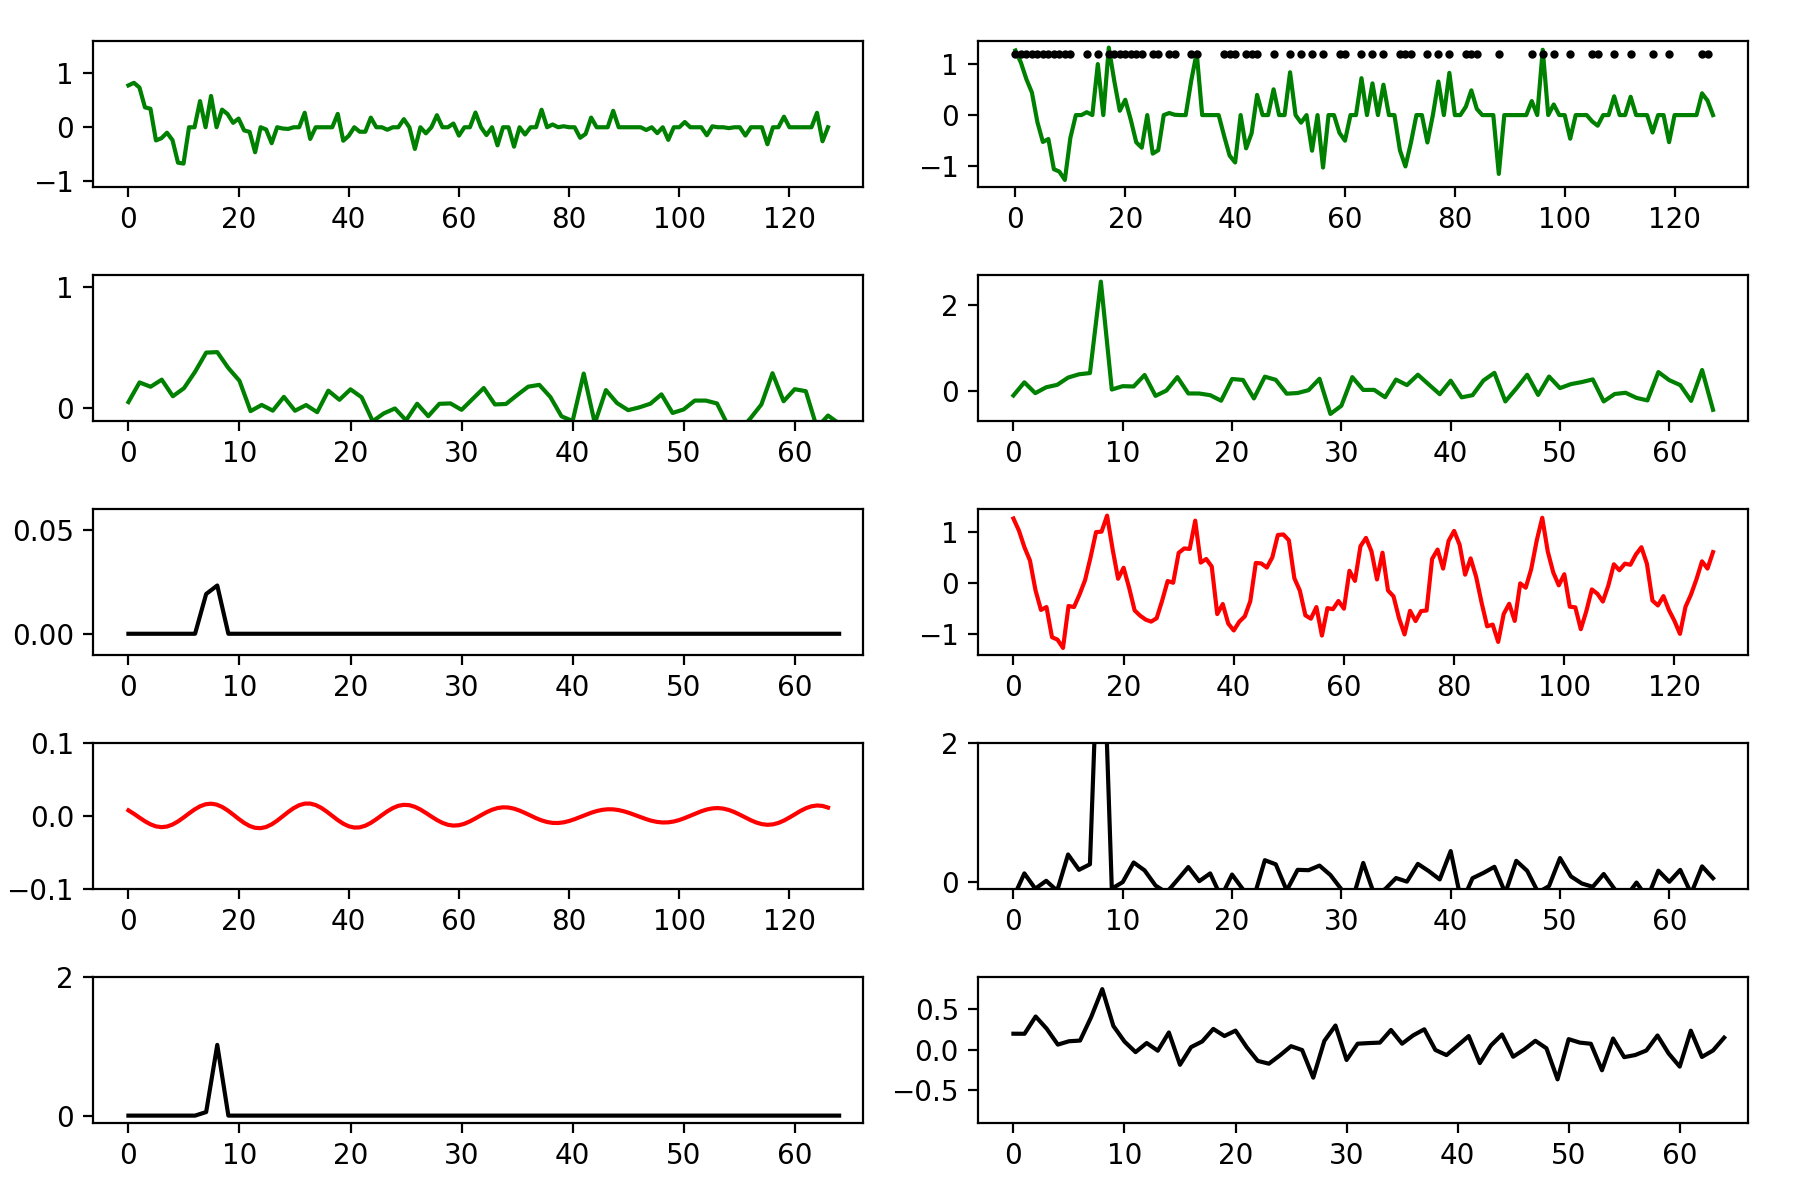

/Users/scott/anaconda/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [15]:
samples = 0.11*(np.cos(2*np.pi*np.arange(fs*duration)*f*1.25/fs)).astype(np.float32)*np.exp(-.003*np.arange(fs*duration))
samples = samples + (np.cos(2*np.pi*np.arange(fs*duration)*f/4/fs)).astype(np.float32)*np.exp(-.003*np.arange(fs*duration))
samples = samples + np.random.normal(0, 0.25, len(samples))
schedule = np.asarray([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0])
samplesNUS = samples*schedule

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=2,figsize=(9,6))
fig.tight_layout()
store = np.zeros(int(len(samplesNUS)/2)+1)

line1, = ax1[0].plot(np.zeros(128), color='green'); line1.axes.set_ylim(-1.1,1.6)
line2, = ax2[0].plot(np.zeros(64), color='green'); line2.axes.set_ylim(-0.1,1.1)
line3, = ax3[0].plot(np.zeros(64), color='black'); line3.axes.set_ylim(-0.01,0.06)
line4, = ax4[0].plot(np.zeros(128), color='red'); line4.axes.set_ylim(-0.1,0.1)
line5, = ax5[0].plot(np.zeros(64), color='black'); line5.axes.set_ylim(-0.1,2)

line6, = ax1[1].plot(samplesNUS, color='green')

y_filt = schedule[schedule == 1]*1.2
x_filt = np.arange(128)[schedule == 1]
schedplot = ax1[1].scatter(x_filt, y_filt, c='black', s=4, zorder=3)


line7, = ax2[1].plot(np.fft.rfft(samplesNUS, norm='ortho'), color='green')

line8, = ax3[1].plot(samples, color='red')
line9, = ax4[1].plot(np.fft.rfft(samples, norm='ortho'), color='black'); line9.axes.set_ylim(-0.1,2)
line10, = ax5[1].plot(np.zeros(64), color='black')#; line10.axes.set_ylim(-0.1,0.3)


def init():  # only required for blitting to give a clean slate.
    line1.set_ydata([np.nan] * 128)
    line2.set_ydata([np.nan] * 64)
    line3.set_ydata([np.nan] * 64)
    line4.set_ydata([np.nan] * 128)
    line5.set_ydata([np.nan] * 64)
    line10.set_ydata([np.nan] * 64)
    return line1, line2, line3, line4, line5, line10

def animate(frames):
    global samplesNUS, store, samples
    if (frames==0):
        samples = 0.11*(np.cos(2*np.pi*np.arange(fs*duration)*f*1.25/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))
        samples = samples + (np.cos(2*np.pi*np.arange(fs*duration)*f/4/fs)).astype(np.float32)*np.exp(-.03*np.arange(fs*duration))
        samples = samples + np.random.normal(0, 0.25, len(samples))
        samplesNUS = samples*schedule
        store = np.zeros(int(len(samplesNUS)/2)+1)
    #ax1.plot(samplesNUS)
    line1.set_data(np.arange(128), samplesNUS)
    rfft = np.fft.rfft(samplesNUS, norm='ortho')
    rfft_plot = np.copy(rfft)
    line2.set_data(np.arange(65), rfft_plot)
    maxrfft = np.amax(rfft)
    thresh = maxrfft * 0.95
    low_values_flags = rfft < thresh
    high_values_flags = rfft >= thresh
    rfft[low_values_flags] = 0 
    rfft[high_values_flags] = rfft[high_values_flags] - thresh
    #ax3.plot(rfft)
    line3.set_data(np.arange(65), rfft)
    store = store + rfft
    sub = np.fft.irfft(rfft, norm='ortho')
    #ax4.plot(sub)
    line4.set_data(np.arange(128), sub)
    #ax5.plot(store)
    line5.set_data(np.arange(65), store)
    sub = sub * schedule
    samplesNUS = samplesNUS - sub
    residual =  -store + np.fft.rfft(samples, norm='ortho')
    if residual.min()*-1 > residual.max() :
        scale = residual.min()*-1.2
    else:
        scale = residual.max()*1.2
    line10.axes.set_ylim(-1*scale, scale)
    line10.set_data(np.arange(65), residual)  
    return line1, line2, line3, line4, line5, line10
    
    
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = np.arange(250), blit=True, interval=10)


In [231]:
print(len(np.fft.rfft(samples, norm='ortho')))
print(len(store))

65
65
